# Linear Regression

## Introduction

> [Linear Regression and Ordinary Least Squares | DotCSV](https://www.youtube.com/watch?v=k964_uNn3l0)


**Linear regression** is a statistical method that allows us to model the relationship between a **dependent variable** $Y$ and one or more **independent variables** $X_i$ (also called **predictors** or **features**). The objective is to find a **linear function** $f$ that allows us to predict the value of $Y$ for any value of $X_i$.

To simplify and understand the basic concepts, in this example we will create a model that predicts an employee's salary considering only their years of experience. That is, we will use a single independent variable, which means we are dealing with a case of **simple linear regression**. It is evident that it would be necessary to analyze more variables to have a better model. If we wanted to consider more independent variables (e.g., education level, type of work, industry sector, city, etc.), we would need to use a **multiple linear regression** model.

## Data Reading and Exploration

We have data on employee salaries at a company along with each employee's years of experience (`salaries.csv` file). We use the `pandas` library to read the data from a [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) file and explore it.

In [1]:
import pandas as pd
df = pd.read_csv("data/salaries.csv")

In [2]:
df.head() # Display the first 5 rows for a preview of the data

,YearsExperience,Salary
0,2.30,39892.0
1,8.29,113813.0
2,5.00,67939.0
3,5.40,83089.0
4,6.10,93941.0


In [3]:
df.info() # Display information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


If our goal is to estimate the salary that an employee will have based on their years of experience, we will consider the number of years of experience as the **independent variable** (also called predictor or feature) and the salary as the **dependent variable** (also called target or response variable). 

This means we are modeling a **relationship between both variables**: we assume that salary depends on (is a function of) the employee's years of experience. Note that while our model assumes this direction of causality based on domain knowledge, correlation alone does not prove causation - we need theoretical understanding to justify this assumption.

## Data Visualization

We will create a **scatter plot** to visualize the relationship between both variables.

A scatter plot displays Cartesian coordinates to show the values of two variables for a dataset. In this case, we will visualize one point for each employee, where the X-axis represents years of experience and the Y-axis represents their salary.

I use the `dataframe.plot` method from **pandas** to create the scatter plot. This method, in turn, uses the **matplotlib** library to generate the visualization.

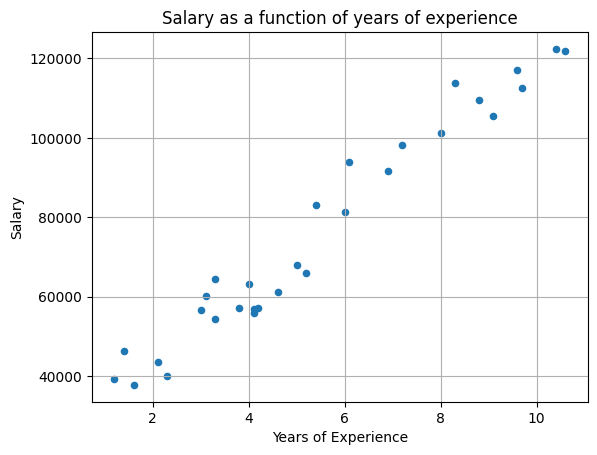

In [4]:
_ = df.plot(kind='scatter', # Create a scatter plot
        x='YearsExperience', # X-axis (independent variable)
        y='Salary', # Y-axis (dependent variable)
        title='Salary as a function of years of experience',
        grid=True, # Show grid
        xlabel='Years of Experience', # X-axis label
        ylabel='Salary') # Y-axis label

We can observe a clear **correlation** between both variables: the greater the number of years of experience, the higher the salary. And the relationship appears quite linear, meaning we can approximate it with a straight line (for one predictor; in multiple linear regression it would be a plane or a **hyperplane**).

The data provides us with a sample of reality, and we seek to find a **model** that describes it. When we later apply the model to an employee for whom we only know their years of experience, we will obtain a **prediction** of their salary.

## Linear Regression Model


We are therefore looking for a straight line that is the model that best fits the data. Knowing that a straight line is defined by the formula
$$\mathbf{y = m*x + b}$$
(where $m$ is the slope of the line and $b$ is the y-intercept), we need to find the values of $m$ and $b$ that best fit the data.

**The model will be formed by this formula, and the model parameters are the coefficients $\mathbf{m}$ and $\mathbf{b}$**.

In [5]:
# Define x as a vector with years of experience data and y as a vector with salary data corresponding to each value of x
x = df['YearsExperience'].values # .values converts that dataframe column into a numpy array
y = df['Salary'].values

We import the `linear_model.LinearRegression` class from the **scikit-learn** library. This class implements the linear regression **model** and allows us to **train** it with the data we have.

Documentation on linear models in scikit-learn: https://scikit-learn.org/stable/modules/linear_model.html

In [6]:
from sklearn.linear_model import LinearRegression

The `LinearRegression.fit()` method receives the values of the independent and dependent variables as parameters and calculates the values of the **model parameters** that best fit the data.

In [7]:
model = LinearRegression().fit(x.reshape(-1, 1), y) # Fit the linear regression model

In this case, we only have one independent variable x (years of experience), but we could have more (**LinearRegression also supports multiple linear regression**). This is why the first parameter is a two-dimensional matrix (an array of arrays) where each row is a sample and each column is an independent variable. The X parameter must therefore be a two-dimensional array where each row is a sample and each column is an independent variable. That's why we use `reshape` to convert it into an array with 1 column and as many rows as there are samples.

We could also pass the data directly from the dataframe; this is equivalent to the previous approach but incorporates the feature names into the model

In [8]:
#model = LinearRegression().fit(df[['YearsExperience']], df['Salary'])

It is important to remember that `df[['YearsExperience']]` returns a dataframe with a single column, while `df['Salary']` returns a series. For the dependent variable (y), the method accepts both options, although it is more common to pass a series since it predicts a single dependent variable. However, for independent variables (x), it only accepts data in columns since there can be more than one independent variable, in which case we should pass a dataframe with as many columns as there are independent variables.
This is the same reason why, when using NumPy, we use `reshape`.

In [9]:
m = model.coef_[0] # Slope (coefficient of x)
b = model.intercept_ # Y-intercept

# With these two values, by applying the line formula, we can calculate the predicted value for any value of x
ŷ = m * x + b

In this case, we use the notation ŷ to refer to predictions of the dependent variable $y$. That is:
- ŷ is the value that the model predicts for a value of $x$
- y are the actual values of the dependent variable (the samples we have from the beginning)

This notation is more mathematical/statistical than Python-specific, but it is widely used in the data science field.

### Visualization of the Regression Line and Its Residuals

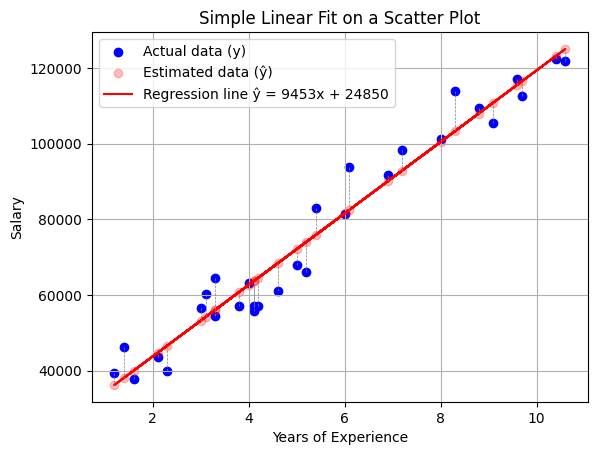

In [10]:
 # This plot is more complete than the previous one, so I use the matplotlib library directly
from matplotlib import pyplot as plt

# Plot the actual data (y) and the estimated data (ŷ) as scatter points
plt.scatter(x, y, c='blue', label='Actual data (y)')
plt.scatter(x, ŷ, c='red', label='Estimated data (ŷ)', alpha=0.25) # alpha is the transparency of the points in the scatter function
# Plot the regression line
plt.plot(x, ŷ,  c='red', label=f'Regression line ŷ = {round(m)}x + {round(b)}')

# Draw error lines (lines from the input data to the fitted line)
for xi, yi, ŷi in zip(x, y, ŷ): # zip() associates elements from the lists into tuples, we unpack and iterate over each trio of elements
    plt.plot([xi, xi], [yi, ŷi], c='gray', linestyle='--', linewidth=.5) # draws a line from point (xi, yi) to point (xi, ŷi)

plt.xlabel('Years of Experience')  # X-axis label
plt.ylabel('Salary')  # Y-axis label
plt.title('Simple Linear Fit on a Scatter Plot')
plt.legend() # Show legend
plt.grid(True) # Add grid
plt.show() # Display the plot

In [11]:
x, y, ŷ

(array([ 2.3 ,  8.29,  5.  ,  5.4 ,  6.1 ,  1.2 ,  3.3 ,  4.1 ,  4.1 ,
         3.1 ,  4.  ,  4.6 ,  3.  ,  8.  , 10.4 ,  3.8 ,  6.9 ,  8.79,
         1.4 ,  9.1 ,  7.19, 10.6 ,  9.6 ,  4.19,  6.  ,  1.6 ,  5.19,
         3.3 ,  9.7 ,  2.1 ]),
 array([ 39892., 113813.,  67939.,  83089.,  93941.,  39344.,  54446.,
         56958.,  55795.,  60151.,  63219.,  61112.,  56643., 101303.,
        122392.,  57190.,  91739., 109432.,  46206., 105583.,  98274.,
        121873., 116970.,  57082.,  81364.,  37732.,  66030.,  64446.,
        112636.,  43526.]),
 array([ 46590.82024449, 103211.58513003,  72112.70091076,  75893.72026873,
         82510.50414517,  36193.01701008,  56043.3686394 ,  63605.40735533,
         63605.40735533,  54152.85896042,  62660.15251584,  68331.68155279,
         53207.60412093, 100470.34609551, 123156.46224331,  60769.64283686,
         90072.5428611 , 107937.85932749,  38083.52668906, 110868.14932992,
         92813.78189563, 125046.97192229, 115594.42352737,  6445

We can see each of the points along with the regression line we calculated and the **residual** for each data point with respect to the model's prediction. What we have sought is the line that best minimizes these **residuals**.

**Important distinction:**
- **Residual:** The difference between an observed value and the value predicted by our model (y - ŷ). This is what we calculate and visualize.
- **Error:** The difference between an observed value and the true (unknown) value, including measurement noise and uncontrolled factors.

We can observe residuals in our data, but true errors are unknown. When training, we minimize the residuals, which is equivalent to minimizing the **mean squared error (MSE)** - the average of the squared residuals across all data points.

In the previous explanation, we extract the model coefficients and calculate the line formula with them to help understand the concept, but we could actually do it directly with the `LinearRegression.predict()` method, which returns the predictions for the input values we pass to it:

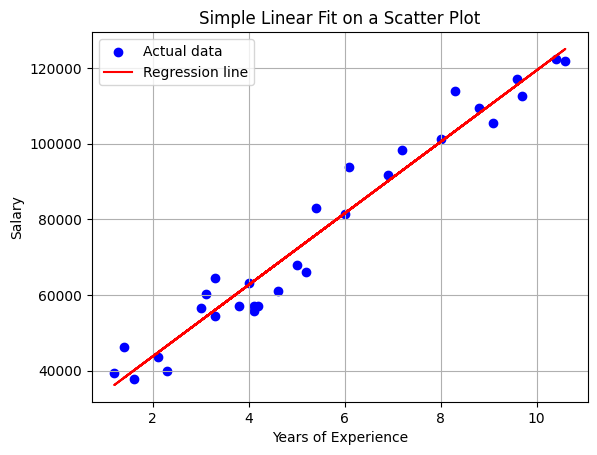

In [12]:
plt.scatter(x, y, c='blue', label='Actual data')
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red', label=f'Regression line')

plt.xlabel('Years of Experience')  # X-axis label
plt.ylabel('Salary')  # Y-axis label
plt.title('Simple Linear Fit on a Scatter Plot')
plt.legend() # Show legend
plt.grid(True) # Add grid
plt.show() # Display the plot

## Error Metrics / Cost Functions

There are different metrics to measure the error of a regression model. The most common are mean squared error (MSE) and mean absolute error (MAE).

These metrics are also used as **cost functions** to minimize when training the model.

### Mean Absolute Error (MAE)

One way to calculate error is using the **mean absolute error (MAE)**, which is the mean of the absolute errors made when taking $\hat y$ as the prediction of $y$.

$$MAE(x,y) = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat y_i|$$

This metric is the most intuitive, as it gives us an idea of how much the model is wrong in each prediction. However, it has a problem: it requires using the absolute value of the errors to prevent them from canceling each other out (negative errors subtracting from positive ones), since we don't care whether the prediction is above or below the actual value—what matters to us is how far away it is. The absolute value function is not differentiable at 0, which makes it difficult to use in **optimization algorithms**. The problem of calculating the line that best fits the data is an **optimization problem**, since what we are looking for is to **minimize the cost function**.

In [13]:
import numpy as np
mae = np.mean(np.abs(y - ŷ))
print("MAE calculated by its formula: ", mae)

from sklearn.metrics import mean_absolute_error
print("MAE calculated with scikit-learn: ", mean_absolute_error(y, ŷ))

MAE calculated by its formula:  4648.313920882825
MAE calculated with scikit-learn:  4648.313920882825


### Mean Squared Error (MSE)

Due to the problems with MAE, it is common to use the **mean squared error (MSE)**, which is the mean of the squared errors.

$$ MSE(x,y)= \frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat y_i)^2}$$

By squaring the errors, we are already preventing them from canceling each other out. Additionally, being a quadratic function, it is differentiable at all points, which facilitates its use in optimization algorithms.

It should be noted that by squaring, we penalize **outliers** (those that are very far from the prediction) more than with MAE. This may or may not be desirable, depending on the problem. These types of issues open the door to debating which of the many metrics is most appropriate for each problem.

Since MSE is the mean of squared errors, the **RMSE** (root mean squared error) is often used as an error metric so that it has the same unit as the dependent variable, which facilitates its interpretation.

$$ RMSE(x,y)= \sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_i-\hat y_i)^2}}$$

In [14]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

print("MSE calculated by its formula: ", np.mean((y-ŷ)**2))
print("MSE calculated with scikit-learn: ", mean_squared_error(y, ŷ))

print("RMSE calculated by its formula: ", np.sqrt(np.mean((y-ŷ)**2)))
print("RMSE calculated with scikit-learn: ", root_mean_squared_error(y, ŷ))

MSE calculated by its formula:  31284275.3151971
MSE calculated with scikit-learn:  31284275.3151971
RMSE calculated by its formula:  5593.234780982924
RMSE calculated with scikit-learn:  5593.234780982924


### Example of Errors in Non-Fitted Lines

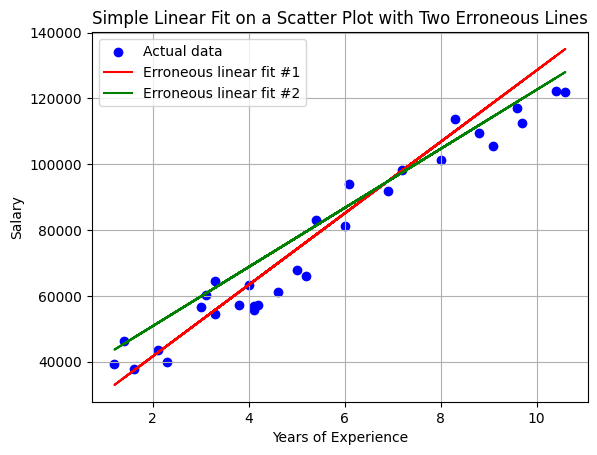

In [15]:
# Generate two erroneous fitted lines to compare with the correct fitted line
ŷ_err_1 = m*(1.15) * x + b - 5000 
ŷ_err_2 = m*(0.95) * x + b + 8000

plt.scatter(x, y, c='blue', label='Actual data')
plt.plot(x, ŷ_err_1, c='red', label='Erroneous linear fit #1')
plt.plot(x, ŷ_err_2, c='green', label='Erroneous linear fit #2')
plt.xlabel('Years of Experience')  # X-axis label
plt.ylabel('Salary')  # Y-axis label
plt.title('Simple Linear Fit on a Scatter Plot with Two Erroneous Lines')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print(f"The MAE in prediction #1 (wrong) is {round(mean_absolute_error(y,ŷ_err_1))} €")
print(f"The MAE in prediction #2 (wrong) is {round(mean_absolute_error(y,ŷ_err_2))} €")
print(f"The MAE in the correct prediction is {round(mean_absolute_error(y,ŷ))} €")

print(f"The MSE in prediction #1 (wrong) is {round(mean_squared_error(y,ŷ_err_1))} €²")
print(f"The MSE in prediction #2 (wrong) is {round(mean_squared_error(y,ŷ_err_2))} €²")
print(f"The MSE in the correct prediction is {round(mean_squared_error(y,ŷ))} €²")

print(f"The RMSE in prediction #1 (wrong) is {round(root_mean_squared_error(y, ŷ_err_1))} €")
print(f"The RMSE in prediction #2 (wrong) is {round(root_mean_squared_error(y, ŷ_err_2))} €")
print(f"The RMSE in the correct prediction is {round(root_mean_squared_error(y, ŷ))} €")

The MAE in prediction #1 (wrong) is 6331 €
The MAE in prediction #2 (wrong) is 6655 €
The MAE in the correct prediction is 4648 €
The MSE in prediction #1 (wrong) is 54072109 €²
The MSE in prediction #2 (wrong) is 62640920 €²
The MSE in the correct prediction is 31284275 €²
The RMSE in prediction #1 (wrong) is 7353 €
The RMSE in prediction #2 (wrong) is 7915 €
The RMSE in the correct prediction is 5593 €


We can observe that the error in both metrics is greater in the two erroneous lines than in the fitted line.

### Other Metrics

There are other metrics to measure the error of a regression model:
- **$R^2$** (coefficient of determination), which tells us what percentage of the variability of the dependent variable is explained by the model. The value of $R^2$ is between 0 and 1, with 0 being a model that explains nothing and 1 being a model that explains all the variability of the dependent variable.
- MAPE (Mean Absolute Percentage Error), which is the MAE expressed as a percentage of the actual value.
- SMAPE (Symmetric Mean Absolute Percentage Error), which is a symmetric version of MAPE.
- Median Absolute Error, which is the MAE but using the median instead of the mean.
- etc.

## Model Fitting

We calculated our model with:
```python
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1, 1), y)
```

This function performed the fitting using the **ordinary least squares (OLS)** method. It is an optimization strategy that seeks to minimize the sum of the squares of the residuals (the difference between the actual values and those predicted by the model).

That is, it searched for the values of $m$ and $b$ that **minimize the mean squared error (MSE)**.

**Note on OLS:** For simple linear regression with one predictor, OLS has a closed-form analytical solution - it can calculate the optimal parameters directly using matrix algebra, without iterative optimization. This makes it very fast to train. For more complex models (like regularized regression or logistic regression), iterative optimization algorithms are needed.

## Prediction of New Values

Once we have the trained model, we can use it to predict the salary of an employee with a certain number of years of experience.

In [17]:
x_new = np.array([1.5, 2.5, 4.5, 5.5, 6.5, 10]) # Create a vector with years of work experience for a series of potential new employees
ŷ_new = m * x_new + b # Calculate the estimated salary for each of them

Normally, it will be calculated directly using the `LinearRegression.predict()` method from scikit-learn. Remember that it was with the `LinearRegression` class that we created the model and that the values of m and b are in the `coef_` and `intercept_` attributes of the `model` object.

In [18]:
ŷ_new = model.predict(x_new.reshape(-1, 1))

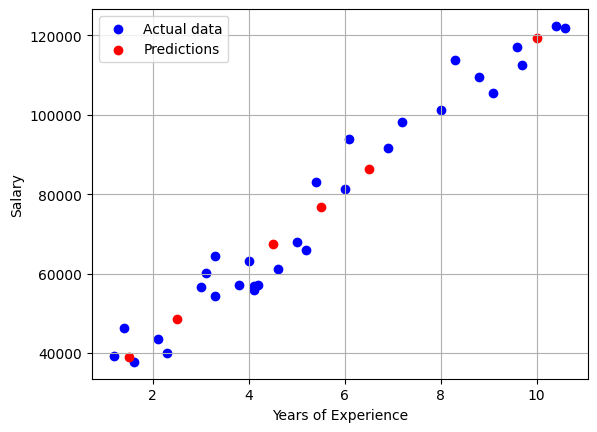

In [19]:
plt.scatter(x, y, c='blue', label='Actual data')
plt.scatter(x_new, ŷ_new, c='red', label='Predictions')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

## Multiple Linear Regression

Just as with a single predictor, linear regression is represented as a line; with two predictors it would be represented as a plane; with three predictors as a hyperplane, etc.

Here you can see a visualization of a linear regression with 2 predictors in 3D: https://miabellaai.net/regression.html

## From Linear Regression to Other Machine Learning Models

Linear regression is one of the simplest machine learning models. In the case of simple linear regression, it is a model with 2 **parameters** (the slope and the y-intercept). It "learns" by finding the parameter values that best fit the data. This "fit" is achieved by minimizing a specific cost function; for standard linear regression, this is the sum of the squared errors (the squared vertical distances from each data point to the line).

While the underlying logic and architecture of other models can be vastly different, many share this fundamental process: they use a learning algorithm to adjust their internal parameters to make a specific loss function as small as possible. The complexity of this process is what scales dramatically. For example, **a large language model (LLM) like GPT-3** has **175 billion parameters** to adjust, compared to just the two in our simple line.

## Sources

- This notebook is based on [this one](https://github.com/FranPuentes/iTI2024/blob/main/Cap.%2017%20-%20regresi%C3%B3n%20lineal%20simple.ipynb) by Professor [Juan Francisco Puentes Calvo](https://github.com/FranPuentes/iTI2024)
- A modified version of [this dataset](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression) is used.
- [Linear Regression in Python](https://realpython.com/linear-regression-in-python)
- https://cienciadedatos.net/documentos/py10-regresion-lineal-python
- [Visualization of errors in linear regression](https://observablehq.com/@yizhe-ang/interactive-visualization-of-linear-regression)
- [Cost Function of Linear Regression: Deep Learning for Beginners](https://builtin.com/machine-learning/cost-function)